# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | madang
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kangding
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | xinqing
Processing Record 13 of Set 1 | eirunepe
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | mugia
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | marolambo
Processing Record 22 of Set 1 | sao vicente
Proc

In [55]:
city_weather

{'coord': {'lon': 115.0882, 'lat': -8.112},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 81.18,
  'feels_like': 87.67,
  'temp_min': 81.18,
  'temp_max': 81.18,
  'pressure': 1011,
  'humidity': 84,
  'sea_level': 1011,
  'grnd_level': 969},
 'visibility': 10000,
 'wind': {'speed': 4.85, 'deg': 229, 'gust': 4.79},
 'clouds': {'all': 100},
 'dt': 1727951683,
 'sys': {'country': 'ID', 'sunrise': 1727906576, 'sunset': 1727950453},
 'timezone': 28800,
 'id': 1626932,
 'name': 'Singaraja',
 'cod': 200}

In [56]:
city_data

[{'City': 'edinburgh of the seven seas',
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max Temp': 57.52,
  'Humidity': 86,
  'Cloudiness': 93,
  'Wind Speed': 28.3,
  'Country': 'SH',
  'Date': 1727950909},
 {'City': 'adamstown',
  'Lat': -25.066,
  'Lng': -130.1015,
  'Max Temp': 69.31,
  'Humidity': 74,
  'Cloudiness': 67,
  'Wind Speed': 17.22,
  'Country': 'PN',
  'Date': 1727950910},
 {'City': 'madang',
  'Lat': -5.2246,
  'Lng': 145.7966,
  'Max Temp': 79.38,
  'Humidity': 89,
  'Cloudiness': 94,
  'Wind Speed': 3.65,
  'Country': 'PG',
  'Date': 1727950912},
 {'City': 'coquimbo',
  'Lat': -29.9533,
  'Lng': -71.3436,
  'Max Temp': 49.73,
  'Humidity': 100,
  'Cloudiness': 0,
  'Wind Speed': 3.44,
  'Country': 'CL',
  'Date': 1727950913},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 24.57,
  'Humidity': 83,
  'Cloudiness': 56,
  'Wind Speed': 10.4,
  'Country': 'GS',
  'Date': 1727950914},
 {'City': 'olonkinbyen',
  'Lat': 70.9221,
  'Lng': -8.7187,
  'Ma

In [57]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,57.52,86,93,28.30,SH,1727950909
1,adamstown,-25.0660,-130.1015,69.31,74,67,17.22,PN,1727950910
2,madang,-5.2246,145.7966,79.38,89,94,3.65,PG,1727950912
3,coquimbo,-29.9533,-71.3436,49.73,100,0,3.44,CL,1727950913
4,grytviken,-54.2811,-36.5092,24.57,83,56,10.40,GS,1727950914


In [59]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,57.52,86,93,28.30,SH,1727950909
1,adamstown,-25.0660,-130.1015,69.31,74,67,17.22,PN,1727950910
2,madang,-5.2246,145.7966,79.38,89,94,3.65,PG,1727950912
3,coquimbo,-29.9533,-71.3436,49.73,100,0,3.44,CL,1727950913
4,grytviken,-54.2811,-36.5092,24.57,83,56,10.40,GS,1727950914


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

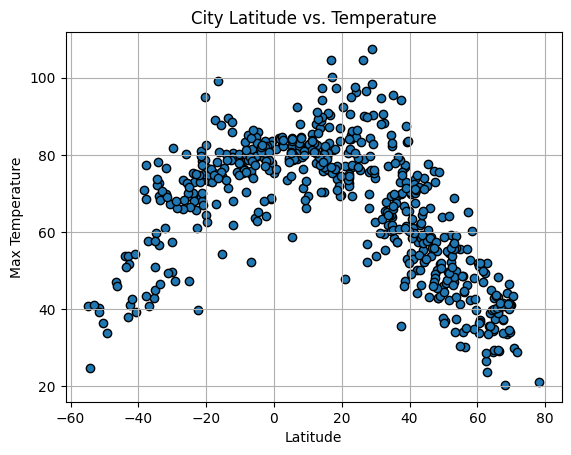

In [63]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

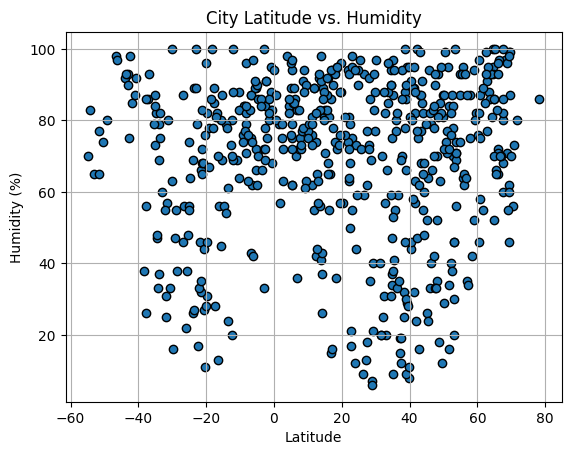

In [64]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

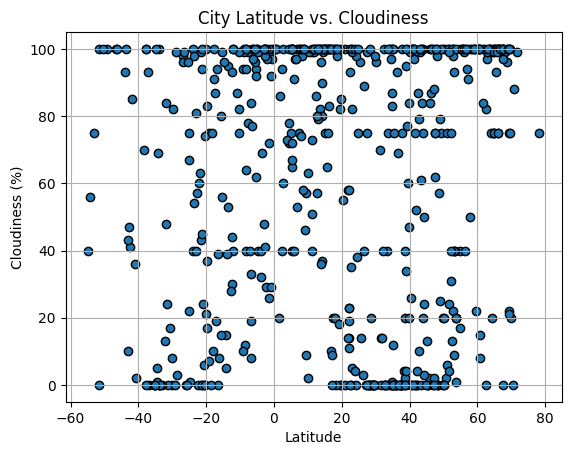

In [65]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

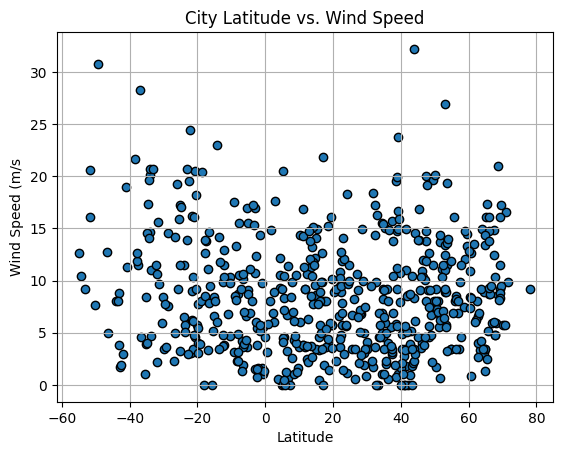

In [66]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, edgecolor="black")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots

from scipy import stats

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"


In [78]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,57.52,86,93,28.30,SH,1727950909
1,adamstown,-25.0660,-130.1015,69.31,74,67,17.22,PN,1727950910
2,madang,-5.2246,145.7966,79.38,89,94,3.65,PG,1727950912
3,coquimbo,-29.9533,-71.3436,49.73,100,0,3.44,CL,1727950913
4,grytviken,-54.2811,-36.5092,24.57,83,56,10.40,GS,1727950914


In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,olonkinbyen,70.9221,-8.7187,29.79,73,88,16.60,SJ,1727950915
7,kangding,30.0513,101.9603,53.64,97,96,4.12,CN,1727950917
8,stanley,54.8680,-1.6985,55.53,87,40,3.44,GB,1727950919
9,georgetown,5.4112,100.3354,80.53,94,40,4.61,MY,1727950920
11,xinqing,48.2333,129.5000,50.11,70,0,5.61,CN,1727950922


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,57.52,86,93,28.30,SH,1727950909
1,adamstown,-25.0660,-130.1015,69.31,74,67,17.22,PN,1727950910
2,madang,-5.2246,145.7966,79.38,89,94,3.65,PG,1727950912
3,coquimbo,-29.9533,-71.3436,49.73,100,0,3.44,CL,1727950913
4,grytviken,-54.2811,-36.5092,24.57,83,56,10.40,GS,1727950914


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6870919846155114


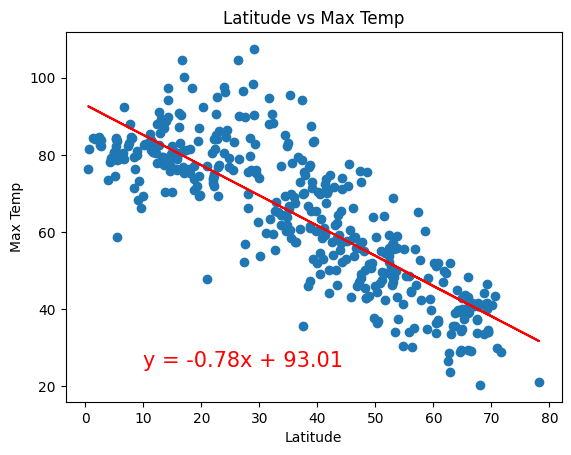

In [84]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,25), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.527686030104396


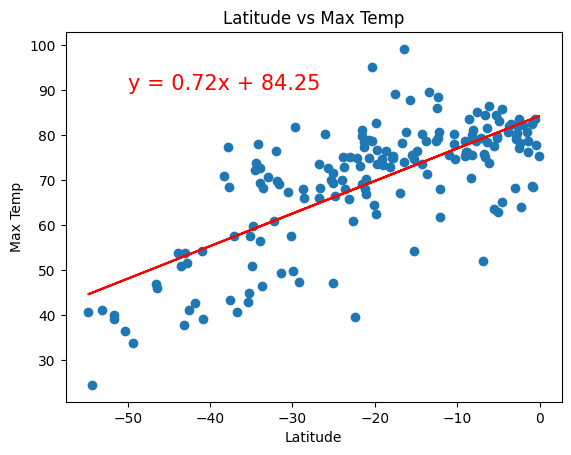

In [86]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,90), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere, there is a moderate to strong negative correlation between latitude and maximum temperature. As latitude increases (moving further north), the maximum temperature decreases. The r^2 value of 0.687 indicates that around 68.7% of the variance in maximum temperature can be explained by latitude alone. This suggests that latitude is a significant factor in determining the temperature in the Northern Hemisphere, but other factors may also play a role.

Alternatively, in the southern hemisphere, there is a moderate positive correlation between latitude and maximum temperature. As latitude increases (moving closer to the equator from the southern latitudes), the temperature increases. The r^2 value of 0.527 indicates that around 52.7% of the variance in maximum temperature is explained by latitude in the Southern Hemisphere. This shows that latitude is still an important factor, but the relationship is not as strong as in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 3.810009261345151e-05


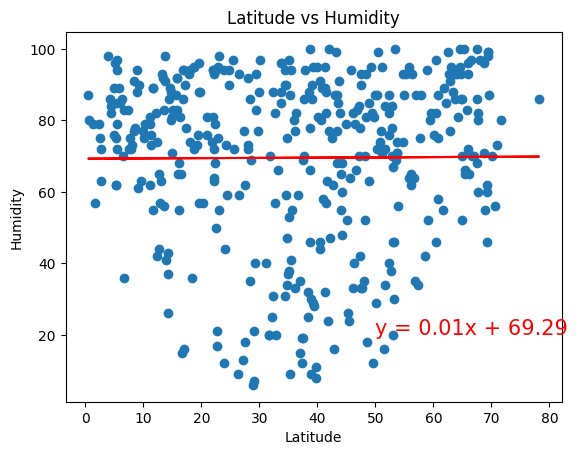

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(50,20), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.011173115080954019


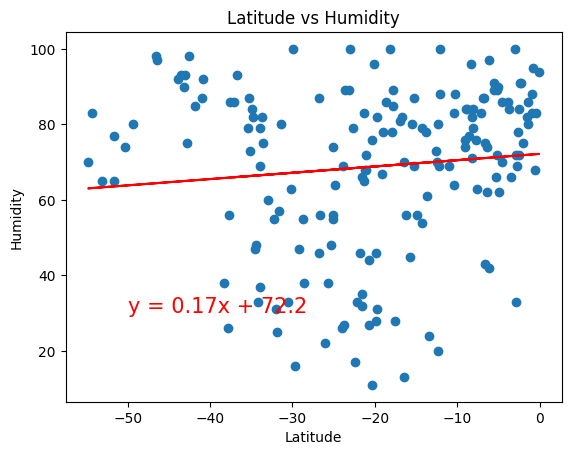

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,30), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere, the slope is very close to zero (0.01), meaning there is almost no relationship between latitude and humidity. The r^2 value is extremely low (close to 0), which means that latitude explains almost none of the variance in humidity in the northern hemisphere. There is no meaningful relationship between latitude and humidity in the northern hemisphere based on this data. Latitude does not appear to significantly impact humidity levels.

In the southern hemisphere, we see a little bit of similarity but the slope is still quite small (0.17), indicating a very weak positive relationship. As latitude increases (closer to the Equator), humidity increases slightly, but the change is minimal. The r^2 value is also very low (0.011), meaning that only about 1.12% of the variance in humidity is explained by latitude. There is a very weak relationship between latitude and humidity in the southern hemisphere. While there is a slight upward trend, it is not significant enough to draw strong conclusions. 

In both hemispheres, the r^2 values are extremely low, indicating that latitude does not significantly explain or predict humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 1.062601219946647e-06


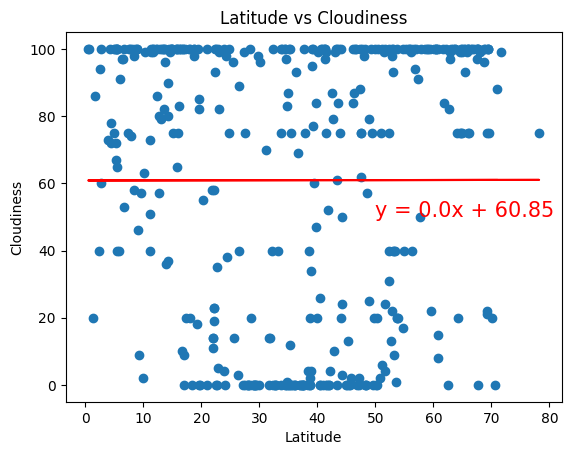

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(50,50), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.05903270945320192


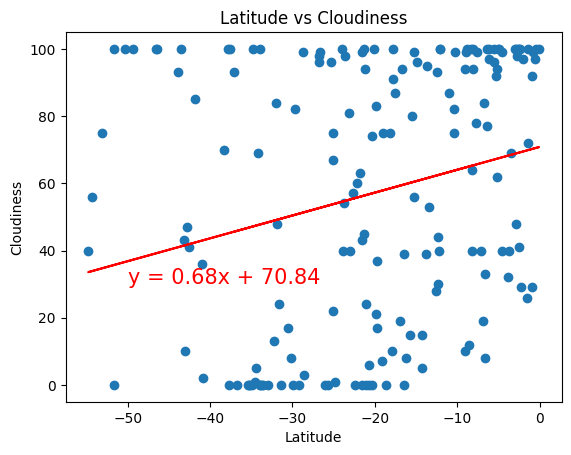

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,30), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

When comparing latitude vs cloudiness, the slope of the line is essentially 0, indicating no relationship between latitude and cloudiness in the northern hemisphere. The r^2 value is extremely close to zero, meaning that latitude explains almost none of the variation in cloudiness. Latitude has no predictive power for cloudiness. There is no meaningful relationship between latitude and cloudiness in the Northern Hemisphere. Cloudiness appears to be distributed randomly and is not influenced by latitude.

In the southern hemisphere, The slope is positive, indicating a slight upward trend. As latitude increases (moving northward towards the equator), cloudiness appears to increase. However, the r^2 value is still very low (0.059), meaning that only about 5.9% of the variation in cloudiness can be explained by latitude. The vast majority (94.1%) of the variation in cloudiness is influenced by other factors. While there is a slight trend suggesting increasing cloudiness with latitude in the southern hemisphere, the relationship is very weak and not significant enough to be a strong predictor.

Overall, in the northern hemisphere, there is no discernible relationship between latitude and cloudiness, as reflected by the near-zero r^2 value and flat regression line and in the southern hemisphere, there is a slight positive correlation, but it is very weak. Latitude has a minor influence on cloudiness, but other factors likely play a much larger role in determining cloudiness levels.


### Wind Speed vs. Latitude Linear Regression Plot

In [94]:
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,olonkinbyen,70.9221,-8.7187,29.79,73,88,16.60,SJ,1727950915
7,kangding,30.0513,101.9603,53.64,97,96,4.12,CN,1727950917
8,stanley,54.8680,-1.6985,55.53,87,40,3.44,GB,1727950919
9,georgetown,5.4112,100.3354,80.53,94,40,4.61,MY,1727950920
11,xinqing,48.2333,129.5000,50.11,70,0,5.61,CN,1727950922


The r^2-value is: 0.023903428133991104


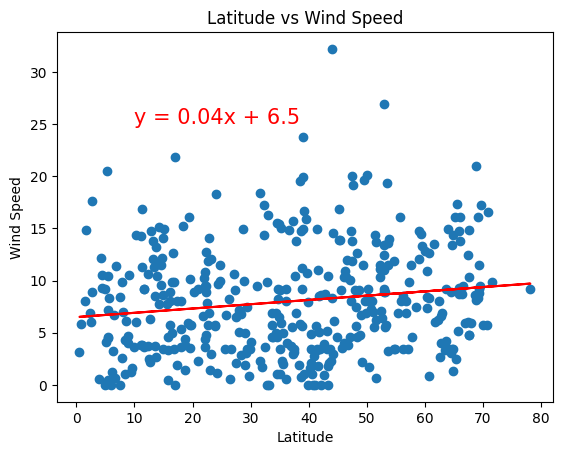

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,25), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.07013708969564902


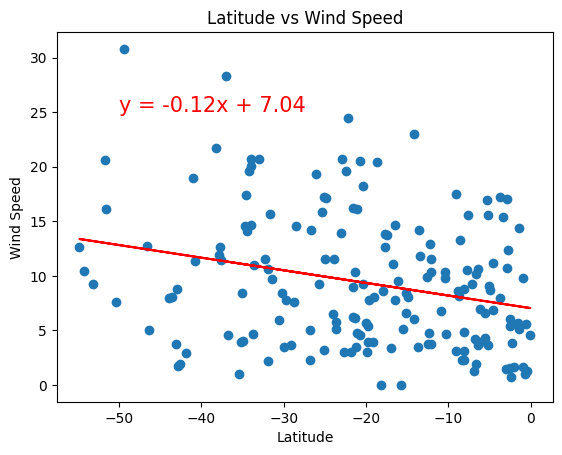

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,25), fontsize = 15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 

Based on the Latitude vs Wind Speed scatter plots for the northern hemisphere, the slope of the line is positive but very small (0.04), indicating a very weak positive correlation. As latitude increases, wind speed increases slightly. The r^2 value is extremely low (0.024), meaning that only about 2.39% of the variance in wind speed can be explained by latitude. In other words, latitude has very little impact on wind speed in the northern hemisphere, and most of the variation is due to other factors. 

In the southern hemisphere, the slope is negative (-0.12), suggesting a slight negative correlation between latitude and wind speed. As latitude increases (moving closer to the equator), wind speed tends to decrease slightly. The r^2 value is still quite low (0.07), meaning that only about 7% of the variance in wind speed is explained by latitude. This is a weak relationship, indicating that other factors are more influential in determining wind speed, similar to the northern hemisphere.

In both the Northern Hemisphere and Southern Hemisphere, the r^2 values are very low, meaning that latitude is not a strong predictor of wind speed. The trends (positive in the Northern Hemisphere, negative in the Southern Hemisphere) are very weak, and the slopes of the lines are small.
